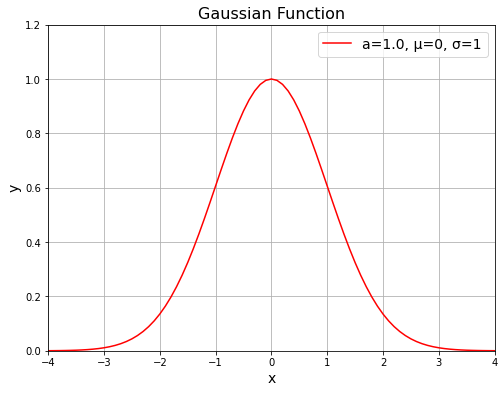

In [ ]:
# GAUSSIAN_01

import numpy as np
import matplotlib.pyplot as plt

# ガウス関数を定義
def gauss(x, a=1, mu=0, sigma=1):
    return a * np.exp(-(x - mu)**2 / (2*sigma**2))

# Figureを作成
fig = plt.figure(figsize=(8, 6))

# FigureにAxesを追加
ax = fig.add_subplot(111)

# Axesのタイトルを'Gaussian Function'に設定
ax.set_title("Gaussian Function", fontsize=16)

# 目盛線を表示
ax.grid()

# 軸ラベルを設定
ax.set_xlabel("x", fontsize=14)
ax.set_ylabel("y", fontsize=14)

# 軸範囲を設定
ax.set_xlim([-4, 4])
ax.set_ylim([0, 1.2])

# -4～8まで0.1刻みの数値の配列
x = np.arange(-4, 8, 0.1)

# グラフに描く関数
f1 = gauss(x)


# Axesにガウス関数を描画
ax.plot(x, f1, color="red", label="a=1.0, μ=0, σ=1")

# 凡例の表示
ax.legend(fontsize=14)

plt.show()

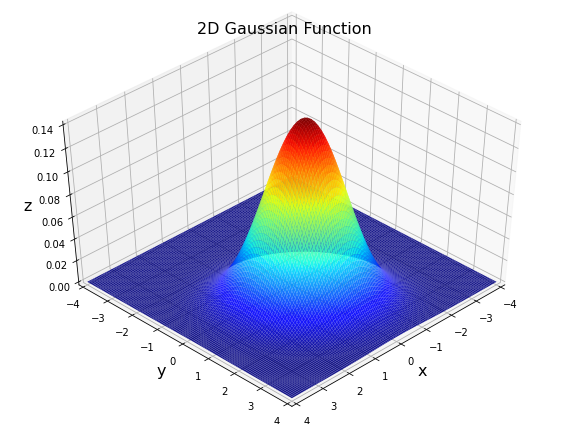

In [ ]:
# GAUSSIAN_04

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# FigureとAxesの設定
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-4.0, 4.0)
ax.set_ylim(-4.0, 4.0)
ax.set_zlim(0.0, 0.14)
ax.set_xlabel("x", size = 16)
ax.set_ylabel("y", size = 16)
ax.set_zlabel("z", size = 16)
ax.view_init(elev=45, azim=45)

# Axesのタイトルを'Gaussian Function'に設定
ax.set_title("2D Gaussian Function", fontsize=16)

# 格子点を作成
n = 128
x = np.linspace(-4, 4, n)
y = np.linspace(-4, 4, n)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# 2変数ガウス関数
mu = np.array([0.5, 1.0])
sigma  = np.array([[1.0, 0.2],[-0.2, 1.0]])
Z = multivariate_normal(mu, sigma).pdf(pos)

# 2変数ガウス関数を3次元プロット
ax.plot_surface(X, Y, Z, cmap="jet",
                cstride=1, rstride=1, alpha=0.9)

plt.tight_layout()
plt.show()

In [ ]:
# 関数から予測値を出力
def z(x, y):
    A =  50.04189995158728
    sigma_x =  6.945036564545614
    sigma_y =  0.22228891225539318
    mu_x =  13.846638974401337
    mu_y =  0.288964674234627 
    return A * 1/(np.sqrt(2*np.pi*sigma_x**2))*np.exp(-(x-mu_x)**2/(2*sigma_x**2)) * 1/(np.sqrt(2*np.pi*sigma_y**2))*np.exp(-(y-mu_y)**2/(2*sigma_y**2))

x, y = map(float().split())
print(z(x, y))

1.2012799944881327


In [ ]:
import numpy as np

# 定数値
A = 50.04189995158728
sigma_x = 6.945036564545614
sigma_y = 0.22228891225539318
mu_x = 13.846638974401337
mu_y = 0.288964674234627

# x,yの範囲
x_range = np.linspace(mu_x - 3*sigma_x, mu_x + 3*sigma_x, 100)
y_range = np.linspace(mu_y - 3*sigma_y, mu_y + 3*sigma_y, 100)

# x,yの組み合わせでのzの最大値とその組み合わせ
max_z = 0
max_x = 0
max_y = 0
for x in x_range:
    for y in y_range:
        z = A * 1/(np.sqrt(2*np.pi*sigma_x**2))*np.exp(-(x-mu_x)**2/(2*sigma_x**2)) * 1/(np.sqrt(2*np.pi*sigma_y**2))*np.exp(-(y-mu_y)**2/(2*sigma_y**2))
        if z > max_z:
            max_z = z
            max_x = x
            max_y = y

print("max z:", max_z)
print("x:", max_x)
print("y:", max_y)


max z: 5.154218002489697
x: 13.636183320930261
y: 0.28222864659052427


In [ ]:
import numpy as np

# 定数値
A = 50.04189995158728
sigma_x = 6.945036564545614
sigma_y = 0.22228891225539318
mu_x = 13.846638974401337
mu_y = 0.288964674234627

def find_x_y(z, distance_threshold = 0.1):
    x_range = np.linspace(mu_x - 3*sigma_x, mu_x + 3*sigma_x, 100)
    y_range = np.linspace(mu_y - 3*sigma_y, mu_y + 3*sigma_y, 100)
    closest_x, closest_y = [], []
    for x in x_range:
        for y in y_range:
            curr_z = A * 1/(np.sqrt(2*np.pi*sigma_x**2))*np.exp(-(x-mu_x)**2/(2*sigma_x**2)) * 1/(np.sqrt(2*np.pi*sigma_y**2))*np.exp(-(y-mu_y)**2/(2*sigma_y**2))
            curr_distance = abs(curr_z-z)
            if curr_distance <= distance_threshold:
                closest_x.append(x)
                closest_y.append(y)
    if len(closest_x) == 0:
        return None, None
    else:
        return closest_x, closest_y

demand_BandGapSize = float(input())

x,y = find_x_y(demand_BandGapSize)
if x is not None and y is not None:
    for i in range(len(x)):
        print(f"x:{x[i]}, y:{y[i]}")
else:
    print("No x,y combination found for the given z")


4
x:9.006158944566518, y:0.24181248072590733
x:9.006158944566518, y:0.25528453601411294
x:9.006158944566518, y:0.26875659130231855
x:9.006158944566518, y:0.28222864659052427
x:9.006158944566518, y:0.2957007018787299
x:9.006158944566518, y:0.3091727571669355
x:9.006158944566518, y:0.3226448124551412
x:9.006158944566518, y:0.3361168677433468
x:9.427070251508678, y:0.214868370149496
x:9.427070251508678, y:0.2283404254377016
x:9.427070251508678, y:0.3495889230315524
x:9.427070251508678, y:0.36306097831975814
x:9.847981558450837, y:0.18792425957308467
x:9.847981558450837, y:0.20139631486129028
x:9.847981558450837, y:0.37653303360796375
x:9.847981558450837, y:0.39000508889616936
x:10.268892865392996, y:0.17445220428487906
x:10.268892865392996, y:0.18792425957308467
x:10.268892865392996, y:0.39000508889616936
x:10.268892865392996, y:0.4034771441843751
x:10.689804172335151, y:0.16098014899667334
x:10.689804172335151, y:0.17445220428487906
x:10.689804172335151, y:0.4034771441843751
x:10.6898041

In [ ]:
# 関数から予測値を出力
def z(x, y):
    A =  50.04189995158728
    sigma_x =  6.945036564545614
    sigma_y =  0.22228891225539318
    mu_x =  13.846638974401337
    mu_y =  0.288964674234627 
    return A * 1/(np.sqrt(2*np.pi*sigma_x**2))*np.exp(-(x-mu_x)**2/(2*sigma_x**2)) * 1/(np.sqrt(2*np.pi*sigma_y**2))*np.exp(-(y-mu_y)**2/(2*sigma_y**2))

x, y = map(float, input().split())
print(z(x, y))

2.3 0.6
0.4866170329785168
